In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

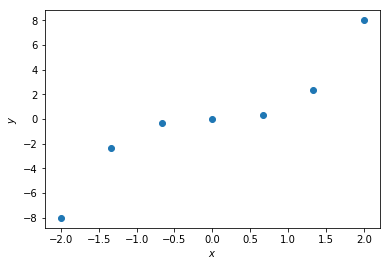

In [5]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

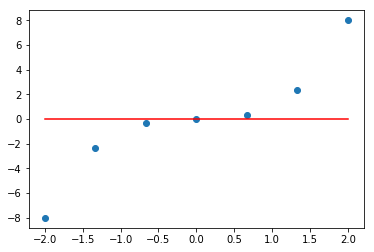

In [13]:
xx = np.linspace(-2, 2, 100)
predictions = [np.mean(y) for x in xx]

X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y);
plt.plot(xx, predictions, c='red');

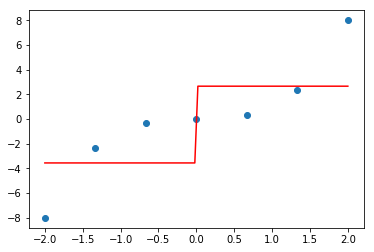

In [21]:
xx = np.linspace(-2, 2, 100)
predictions =  [np.mean(y[X < 0]) if x < 0 else np.mean(y[X >= 0])
              for x in xx]

X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y);
plt.plot(xx, predictions, c='red');

In [24]:
def regression_var_criterion(X, y, t):
    X_left, X_right = X[X < t], X[X >= t]
    y_left, y_right = y[X < t], y[X >= t]
    return np.var(y) - X_left.shape[0] / X.shape[0] * np.var(y_left) - X_right.shape[0] / X.shape[0] * np.var(y_right)

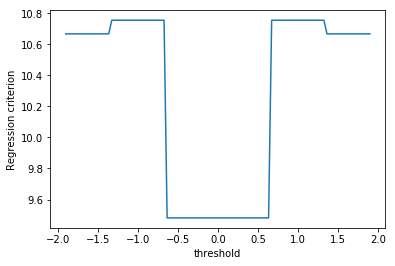

In [26]:
thresholds = np.linspace(-1.9, 1.9, 100)
crit_by_thres = [regression_var_criterion(X, y, thres) for thres in thresholds]

plt.plot(thresholds, crit_by_thres)
plt.xlabel('threshold')
plt.ylabel('Regression criterion');


### Q1 - no

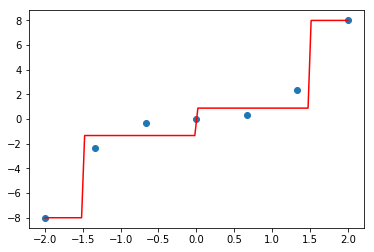

In [42]:
def prediction(x, X, y):
    if x >= 1.5:
        return np.mean(y[X >= 1.5])
    elif x < 1.5 and x >= 0:
        return np.mean(y[(X >= 0) & (X < 1.5)])
    elif x >= -1.5 and x < 0:
        return np.mean(y[(X < 0) & (X >= -1.5)])
    else:
        return np.mean(y[X < -1.5])
    
    
predictions = [prediction(x, X, y) for x in xx]

X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y);
plt.plot(xx, predictions, c='red');

### Q2 - 7

In [45]:
df = pd.read_csv('../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [47]:
df['age_years'] = (df.age / 365.25).astype('int')
train_df = pd.get_dummies(df, columns=['cholesterol', 
                                       'gluc']).drop(['age','cardio'],
                                                     axis=1)
target = df.cardio

In [50]:
train_df.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,50,1,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,55,0,0,1,1,0,0
2,1,165,64.0,130,70,0,0,0,51,0,0,1,1,0,0
3,2,169,82.0,150,100,0,0,1,48,1,0,0,1,0,0
4,1,156,56.0,100,60,0,0,0,47,1,0,0,1,0,0


In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df.values, 
                                                      target.values,
                                                      test_size=.3, 
                                                      random_state=17)


In [53]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, 
                                                                y_train)

In [69]:
export_graphviz(tree, 'mlbootcamp5_dtree1.dot', filled=True, 
                feature_names=train_df.columns.values)

In [72]:
!dot -Tpng mlbootcamp5_dtree1.dot -o mlbootcamp5_dtree1.png
!rm mlbootcamp5_dtree1.dot

## Q3 age, ap_hi, chol=3

Error: dot: can't open mlbootcamp5_dtree1.dot
rm: mlbootcamp5_dtree1.dot: No such file or directory


In [77]:
reg_tree_pred = tree.predict(X_valid)

tree_acc_valid = accuracy_score(y_valid, reg_tree_pred)
tree_acc_valid

0.7212857142857143

In [79]:
%%time
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=17), 
                         tree_params, 
                         cv=5, scoring='accuracy') 

tree_grid.fit(X_train, y_train)

CPU times: user 3.87 s, sys: 101 ms, total: 3.97 s
Wall time: 4.35 s


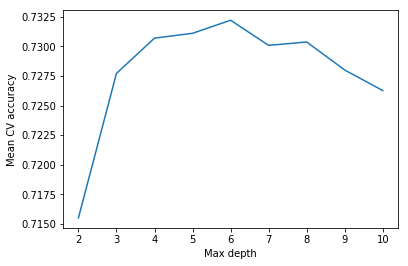

In [81]:
plt.plot(tree_params['max_depth'], 
         tree_grid.cv_results_['mean_test_score'])
plt.xlabel('Max depth')
plt.ylabel('Mean CV accuracy');

In [83]:
print("Best params:", tree_grid.best_params_)
print("Best cross validaton score", tree_grid.best_score_)

Best params: {'max_depth': 6}
Best cross validaton score 0.732204081632653


In [86]:
tuned_tree_acc_valid = accuracy_score(y_valid, 
                                      tree_grid.predict(X_valid))
tuned_tree_acc_valid

## Q4 yes, no

0.7256666666666667

In [87]:
## Q5 Верхнее артериальное давление от 140 до 160 (мм рт.ст.)